In [439]:
import numpy as np
import json
from scipy import stats
import matplotlib.pyplot as plt

DATA_LOCATION = '/Users/brendan/Documents/projects/risky_sir/go/data/'

In [86]:
# number of individuals
N = 1000
# chance of spreading per individual before recovering
a = 3/1000

In [147]:
def compute_g(a, N=1000):
    upper_g = 1
    lower_g = 0
    for T in range(1000):
        g = (upper_g + lower_g)/2
        g_ = (1 - a + a * g)**N
        if g_ < g:
            upper_g = g
        else:
            lower_g = g
    return g

compute_g(8/1000)

0.00032569632881670476

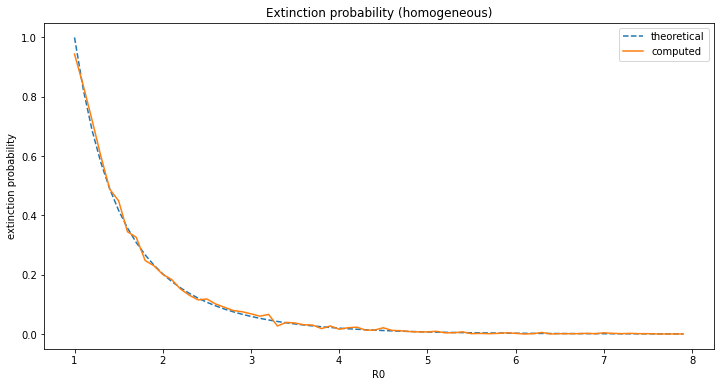

In [144]:
A = np.arange(0.001, 0.008, 0.0001)
G = [compute_g(a) for a in A]
plt.figure(figsize=(12, 6))
plt.plot(A*1000, G, '--', label="theoretical")
plt.plot(A*1000, extinction_prob, label="computed")
plt.ylabel('extinction probability')
plt.xlabel('R0')
plt.title('Extinction probability (homogeneous)')
plt.legend()

Text(0, 0.5, 'Extinction probability (computed)')

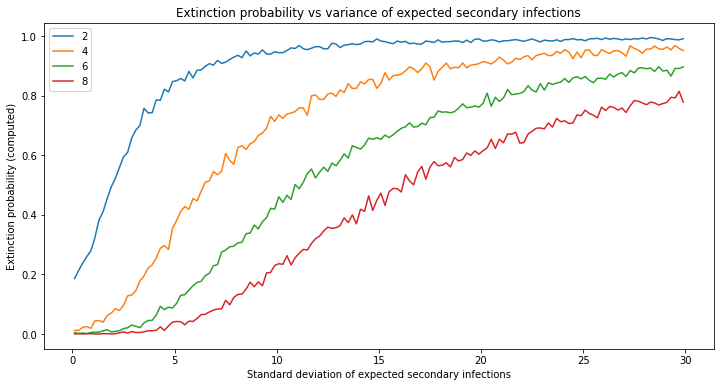

In [400]:
plt.figure(figsize=(12, 6))
for mu in [2, 4, 6, 8]:
    FILE = f'/Users/brendan/Documents/projects/risky_sir/go/data/extinctions_hetero_alphac_{mu}.json'
    with open(FILE) as file:
        data = json.load(file)
    stds = []
    extinction_probs = []
    for tr in data['TrialResults']:
        stds.append(tr['Std'])
        extinction_probs.append(len([r for r in tr['FinalRs'] if r < 100])/N)
    plt.plot(stds, extinction_probs, label=mu)
plt.legend()
plt.title('Extinction probability vs variance of expected secondary infections')
plt.xlabel('Standard deviation of expected secondary infections')
plt.ylabel('Extinction probability (computed)')

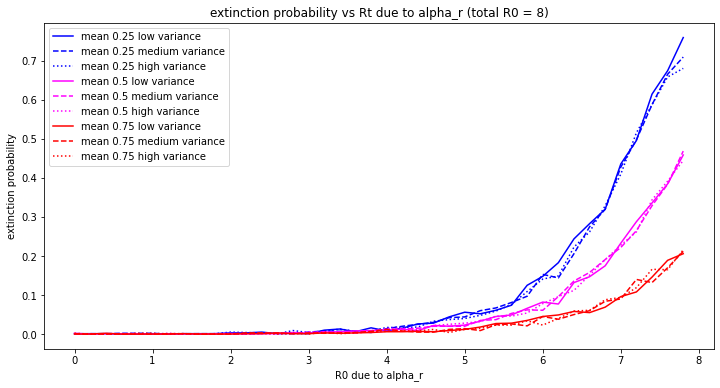

In [523]:
plt.figure(figsize=(12, 6))
plt.ylabel('extinction probability')
plt.xlabel('R0 due to alpha_r')
plt.title('extinction probability vs Rt due to alpha_r (total R0 = 8)')
for i, p in enumerate(['25', '5', '75']):
    for j, var in enumerate(['low', 'medium', 'high']):
        FILE = f'{DATA_LOCATION}/extinctions_risk_p0{p}_{var}.json'
        with open(FILE) as file:
            data = json.load(file)
        alphaCs = []
        extinction_probs = []
        for tr in data['TrialResults']:
            alphaCs.append(8 - tr['AlphaC'])
            extinction_probs.append(len([r for r in tr['FinalRs'] if r < 100])/N)
        plt.plot(alphaCs, extinction_probs, label=f'mean 0.{p} {var} variance', color=colors[i], linestyle=linestyles[j])
plt.legend()

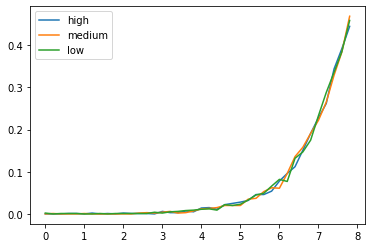

In [445]:
for var in ['high', 'medium', 'low']:
    FILE = f'{DATA_LOCATION}/extinctions_risk_p05_{var}.json'
    with open(FILE) as file:
        data = json.load(file)
    alphaCs = []
    extinction_probs = []
    for tr in data['TrialResults']:
        alphaCs.append(8 - tr['AlphaC'])
        extinction_probs.append(len([r for r in tr['FinalRs'] if r < 100])/N)
    plt.plot(alphaCs, extinction_probs, label=var)
plt.legend()

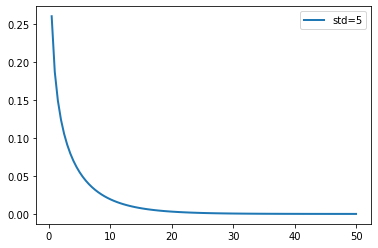

In [408]:
mu = 4

for std in [5]:
    x = np.linspace(0, 50, 100)
    #plt.plot(x, 0*x, '--', c='black')


    alpha = mu * mu / (std * std)
    beta = mu / (std * std)

    scale = 1/beta
    g = stats.gamma(alpha, scale=scale)
    plt.plot(x, g.pdf(x), lw=2, label=f'std={std}')
plt.legend()

#g.std()

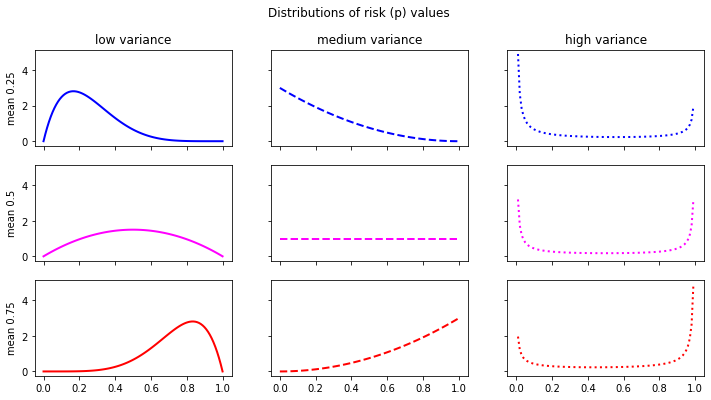

In [513]:
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 6))
fig.suptitle("Distributions of risk (p) values")
bases = [(1, 3, "mean 0.25"), (1, 1, "mean 0.5"),  (3, 1, "mean 0.75")]
factors = [(2, "low variance"), (1, "medium variance"), (0.1, "high variance")]
linestyles = ['-', '--', ':']
colors = ["blue", "magenta", "red"]
for i, (a, b, desc_i) in enumerate(bases):
    for j, (f, desc_j) in enumerate(factors):
        

        x = np.linspace(0, 1, 100)

        g = stats.beta(f*a, f*b)
        axs[i][j].plot(x, g.pdf(x), lw=2, color=colors[i], linestyle=linestyles[j])
        if (i == 0):
            axs[i][j].set_title(desc_j)
        if (j == 0):
            axs[i][j].set_ylabel(desc_i)
        #plt.legend()

#g.std()